# DDPM analysis

## Importing libraries

In [23]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [24]:
import torch
from dataset import AllCTsDataset
import dataset.utils as utils
from evaluation.fid.fid import fid_from_path

## Showing examples

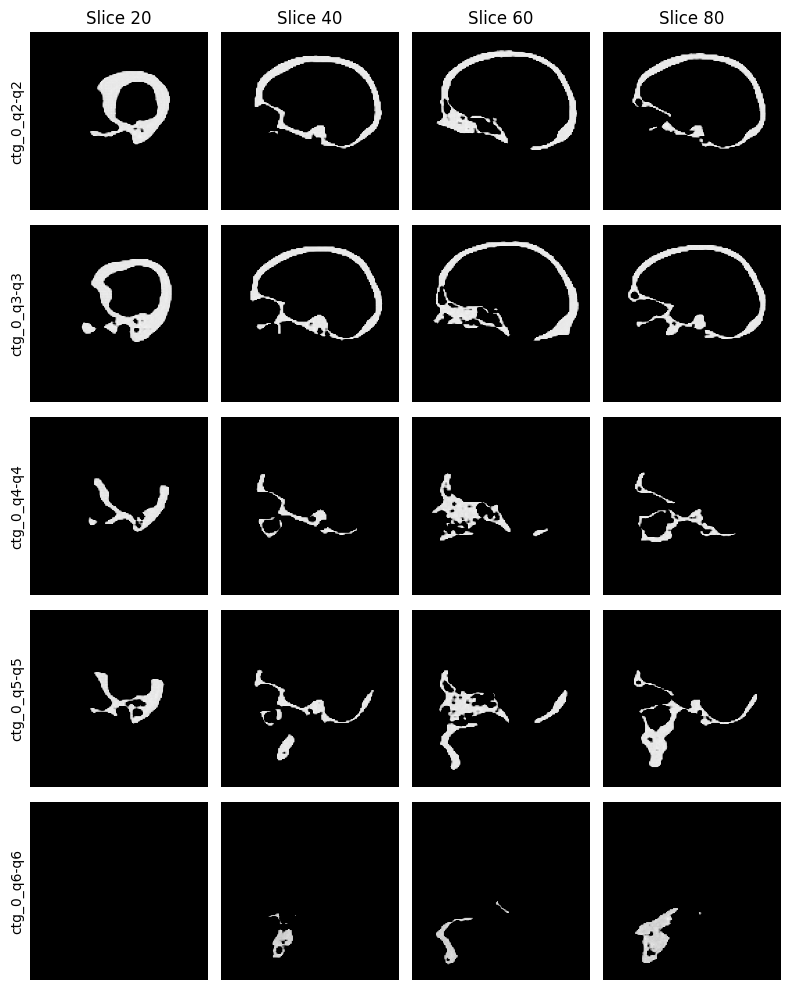

In [52]:
data_name = 'dist-cd-05'
dataset = AllCTsDataset(root_dir=f'../data/{data_name}', split='train', resize_d=1, resize_h=1, resize_w=1)

images = []
names = []
skip = 0
for i in range(5):
    quality_items = dataset.df.loc[:, dataset.df.columns.str.startswith('quality')]
    quality_df = quality_items[quality_items.iloc[:, i%5] == 1]
    
    index_name = quality_df.index[skip]
    index = dataset.df.index.get_loc(index_name)

    name = dataset.df.iloc[index, :]['name'] + f'-q{i%5+2}'
    
    names.append(name)
    img = dataset[index]['data']
    images.append(img)

utils.show_image_grid(images, names=names, vmin=0, slices=(range(20,100,20)), axis=1)

## Reconstructing some meshes

In [58]:
n = 1
skip = 0
quality_score = 6
quality_items = dataset.df.loc[:, dataset.df.columns.str.startswith('quality')]
quality_df = quality_items[quality_items.iloc[:, quality_score - 2] == 1]
for i in range(n):
    index_name = quality_df.index[skip + i]
    index = dataset.df.index.get_loc(index_name)
    img = dataset[index]['data']
    name = dataset.df.iloc[index, :]['name'] + f'-q{quality_score}'
    img = torch.squeeze(img).detach().cpu().numpy()
    
    utils.build_mesh(img, threshold=0, name=name, output_folder=f'../data/{data_name}-meshes')

TriangleMesh with 19394 points and 38744 triangles.


## Calculating metrics

In [9]:
name1 = 'dist-lrt-05/dist-lrt-05'
name2 = 'allcts-train/allcts-train'

In [10]:
fid = fid_from_path('../evaluation/fid/stats/', name1, name2)
fid

0.01314957741398637

In [11]:
fids = []
for i in range(5):
    quality = i + 2
    quality_name1 = f'{name1}-{quality}'
    quality_name2 = f'{name2}-{quality}'
    fid = fid_from_path('../evaluation/fid/stats/', quality_name1, quality_name2)
    fids.append(fid)

fids

[0.011780125443360923,
 0.013432304621465226,
 0.017173355272456725,
 0.019510696972278793,
 0.06647132581914172]